In [2]:

import os
import glob

image_dir = "/content/drive/MyDrive/MS/MSFD/1/face_crop"
mask_dir = "/content/drive/MyDrive/MS/MSFD/1/face_crop_segmentation"

image_paths = sorted(glob.glob(os.path.join(image_dir, "*.jpg")))
mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.jpg")))


In [4]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [5]:

def segment_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


    _, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY_INV)

    edges = cv2.Canny(thresh, 50, 150)

    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)


    return (cleaned > 0).astype(np.uint8)


In [6]:
# STEP 5: Metrics
def compute_iou(gt, pred):
    intersection = np.logical_and(gt, pred)
    union = np.logical_or(gt, pred)
    return np.sum(intersection) / np.sum(union)

def compute_dice(gt, pred):
    intersection = np.sum(gt * pred)
    return (2. * intersection) / (np.sum(gt) + np.sum(pred))


In [13]:

def visualize_segmentation(image, gt_mask, pred_mask):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gt_mask, cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask, cmap='gray')
    plt.title("Predicted")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


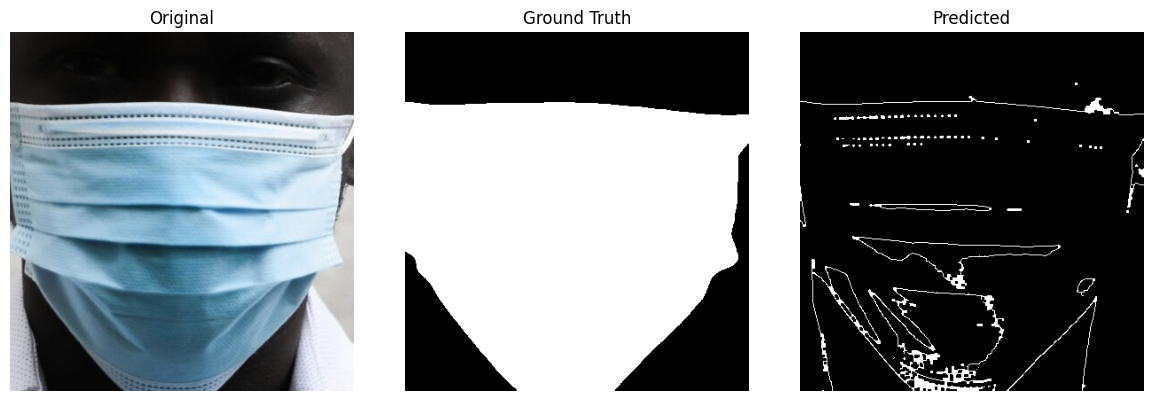

000000_1.jpg → IoU: 0.0504, Dice: 0.0959


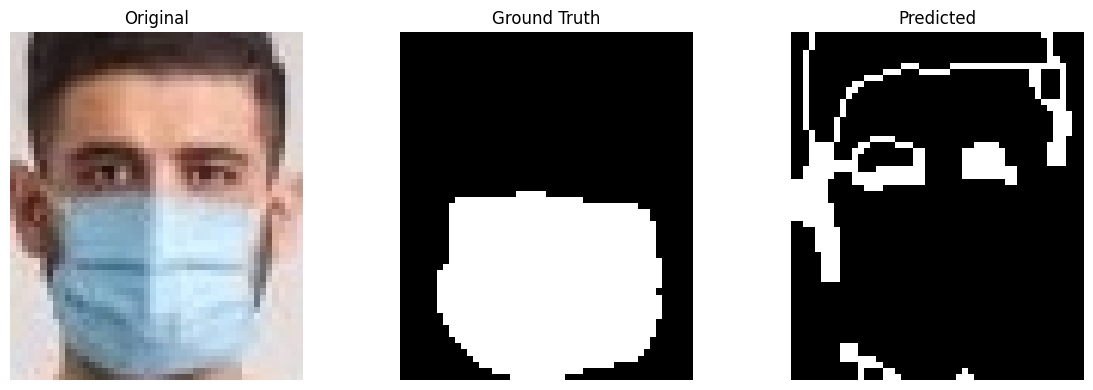

000001_1.jpg → IoU: 0.0100, Dice: 0.0198


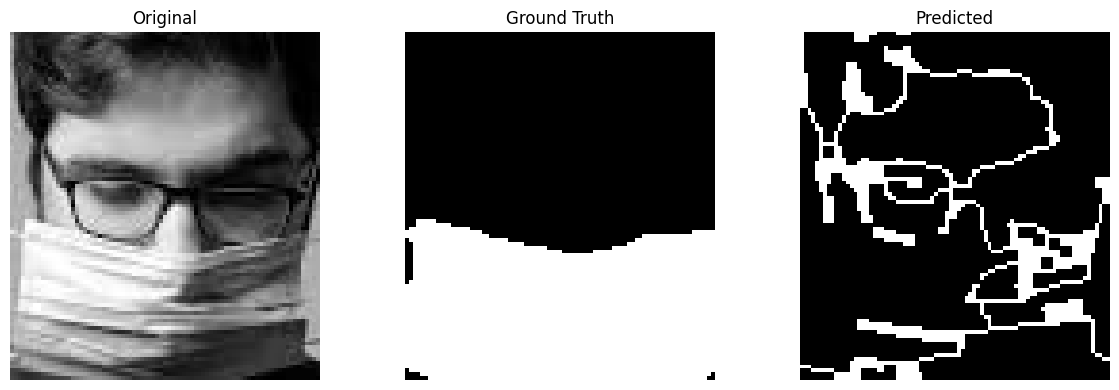

000002_1.jpg → IoU: 0.1467, Dice: 0.2559


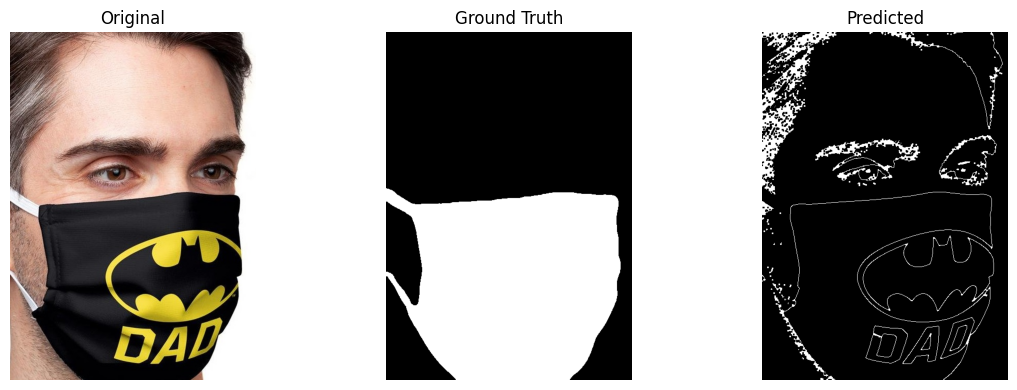

000003_1.jpg → IoU: 0.0286, Dice: 0.0555


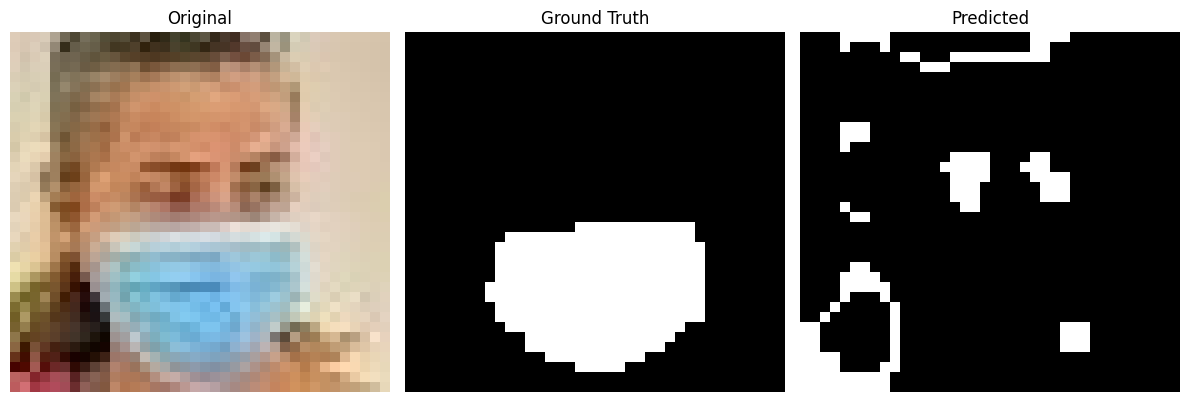

000004_1.jpg → IoU: 0.0178, Dice: 0.0349


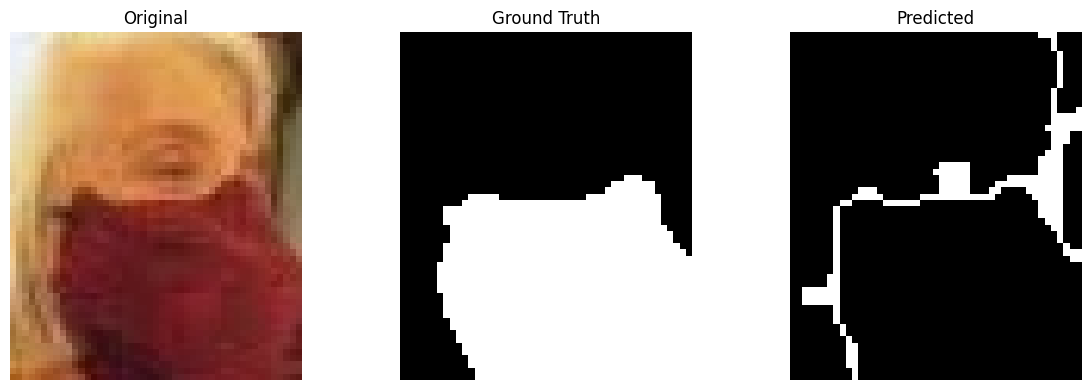

000005_1.jpg → IoU: 0.0523, Dice: 0.0995


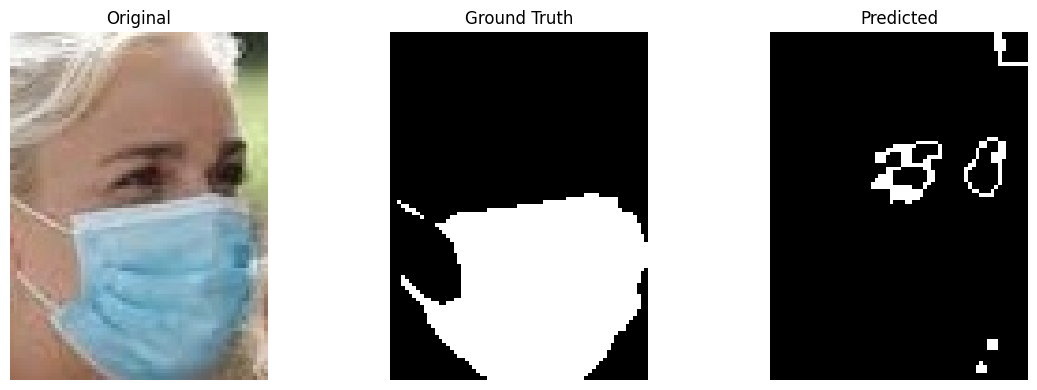

000006_1.jpg → IoU: 0.0016, Dice: 0.0032


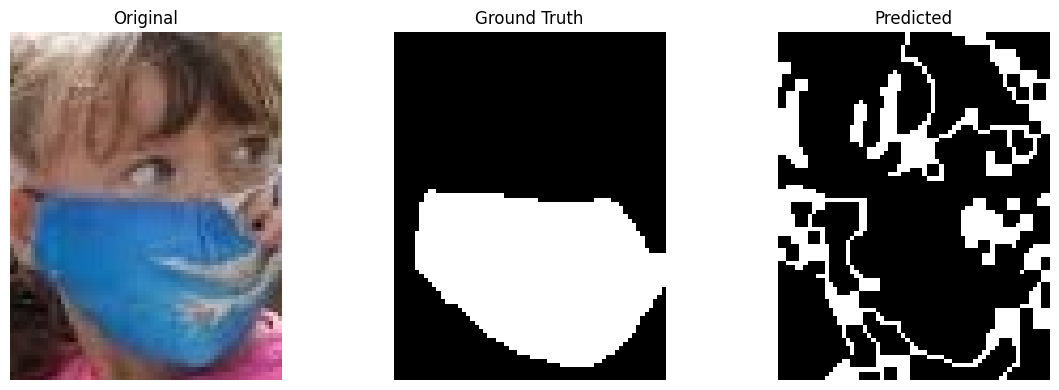

000006_2.jpg → IoU: 0.1599, Dice: 0.2757


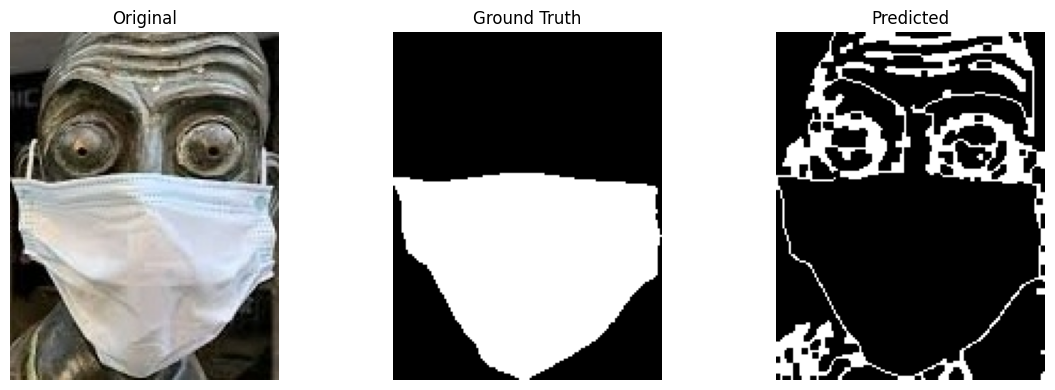

000007_1.jpg → IoU: 0.0157, Dice: 0.0310


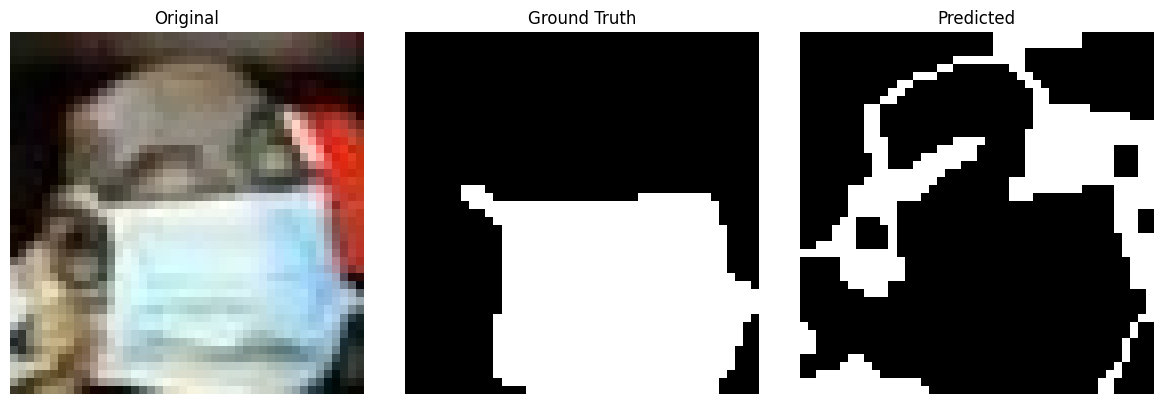

000007_2.jpg → IoU: 0.0346, Dice: 0.0669


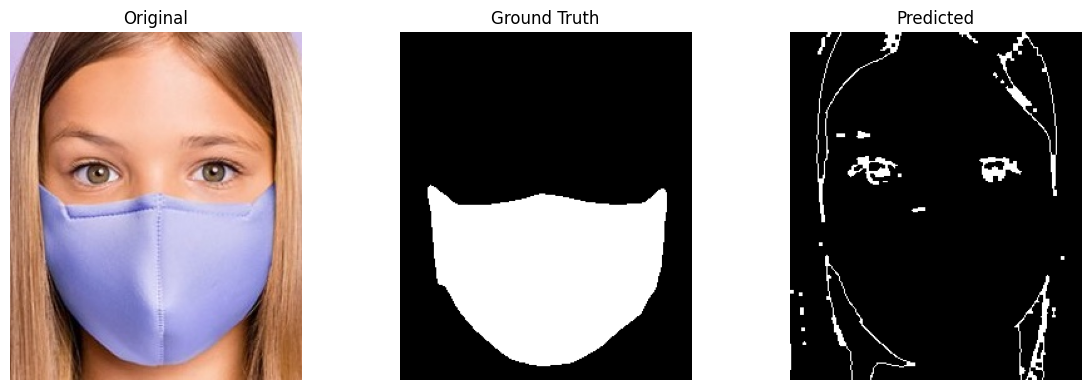

000008_1.jpg → IoU: 0.0157, Dice: 0.0309


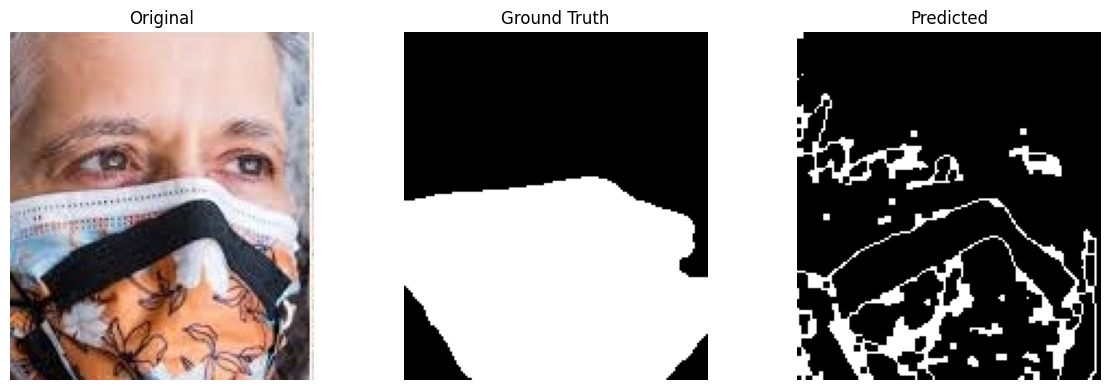

000009_1.jpg → IoU: 0.1661, Dice: 0.2848


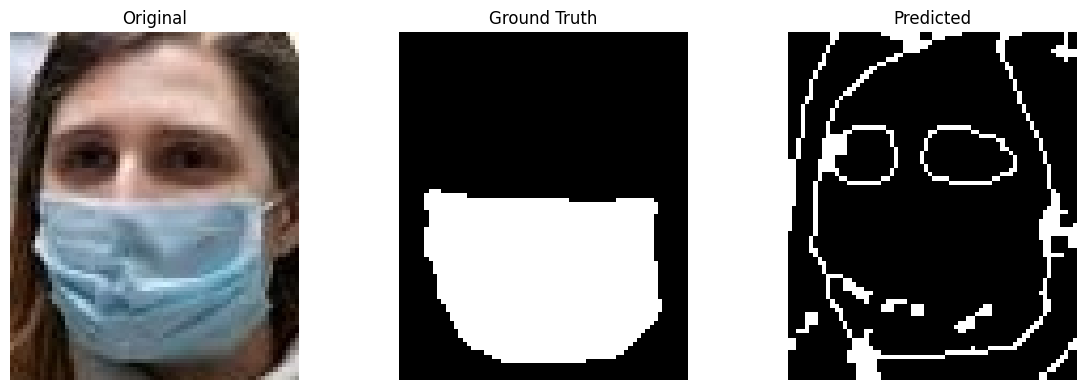

000010_1.jpg → IoU: 0.0713, Dice: 0.1331


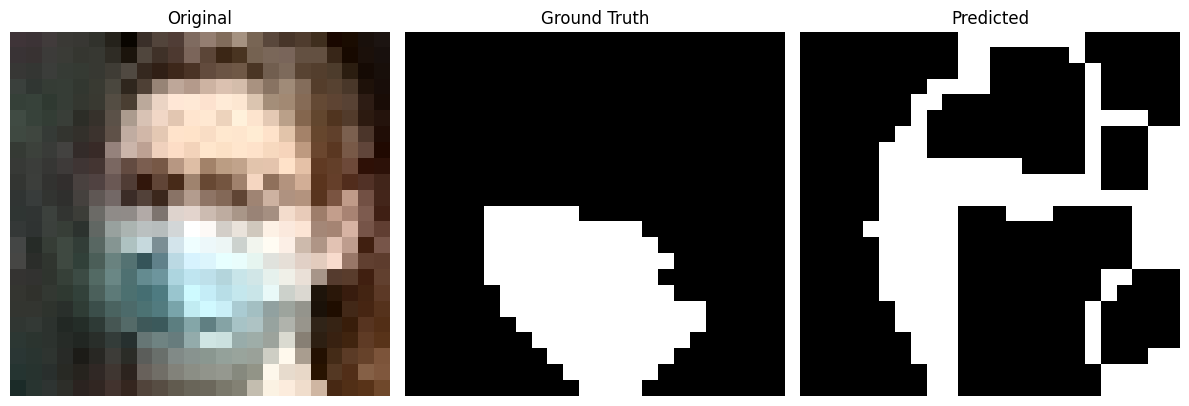

000011_1.jpg → IoU: 0.1701, Dice: 0.2908


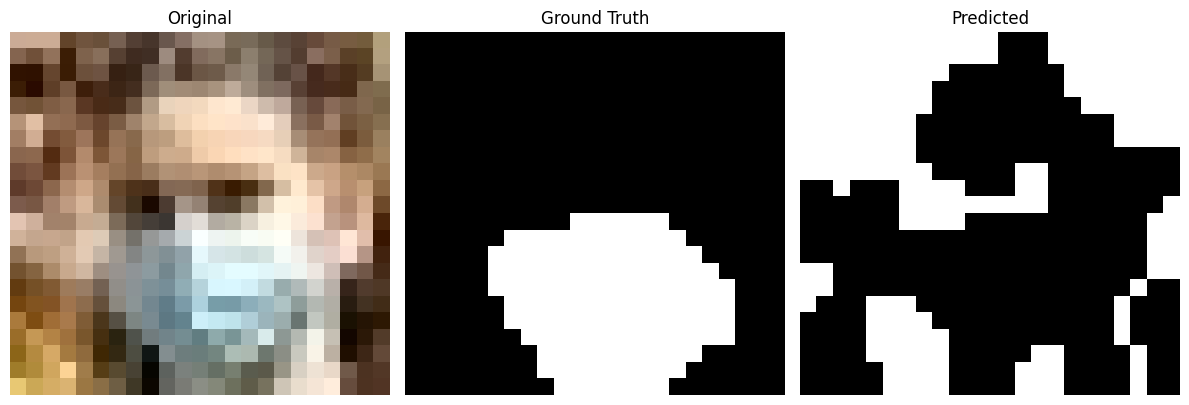

000011_2.jpg → IoU: 0.0588, Dice: 0.1111


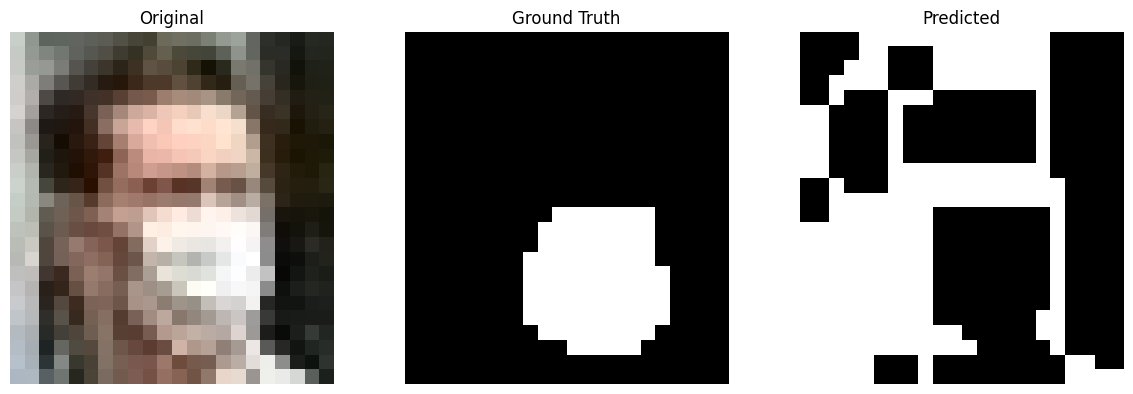

000011_3.jpg → IoU: 0.0462, Dice: 0.0883


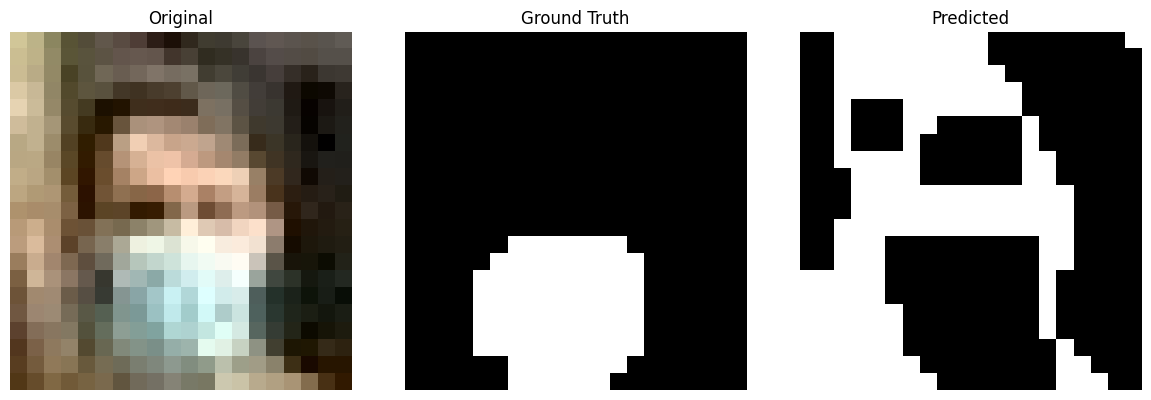

000011_4.jpg → IoU: 0.0460, Dice: 0.0880


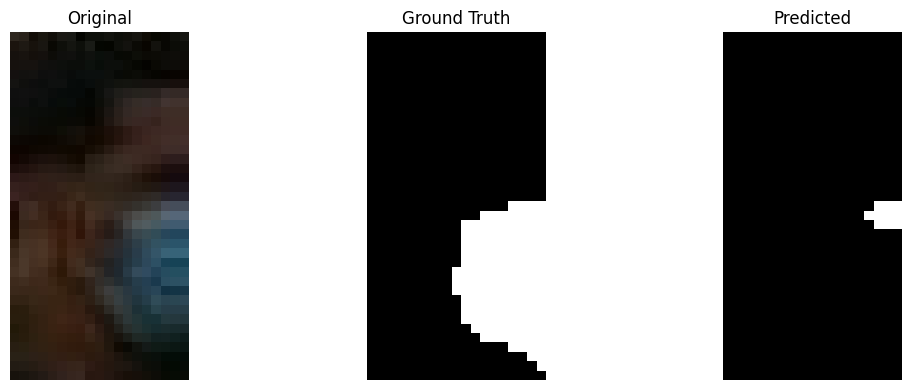

000011_5.jpg → IoU: 0.0741, Dice: 0.1379


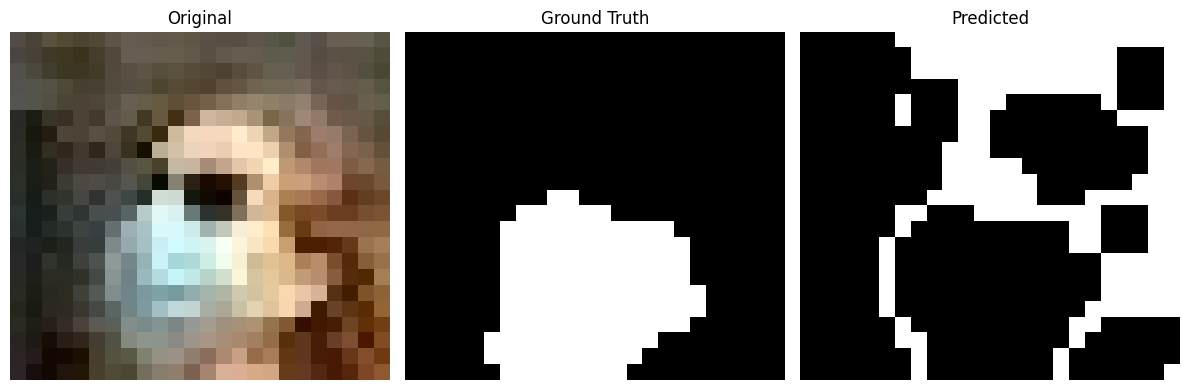

000011_6.jpg → IoU: 0.0511, Dice: 0.0972


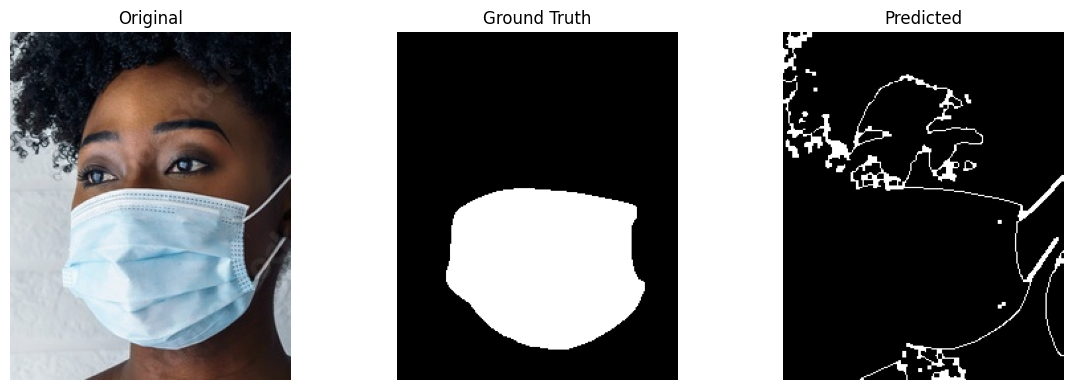

000012_1.jpg → IoU: 0.0131, Dice: 0.0259


In [10]:

ious, dices = [], []

image_paths = image_paths[:20]
mask_paths = mask_paths[:20]

for img_path, mask_path in zip(image_paths, mask_paths):

    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    gt_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    gt_mask = (gt_mask > 127).astype(np.uint8)


    pred_mask = segment_image(image)


    iou = compute_iou(gt_mask, pred_mask)
    dice = compute_dice(gt_mask, pred_mask)
    ious.append(iou)
    dices.append(dice)


    visualize_segmentation(image, gt_mask, pred_mask)

    print(f"{os.path.basename(img_path)} → IoU: {iou:.4f}, Dice: {dice:.4f}")


In [12]:

print(f" Average IoU: {np.mean(ious):.4f}")
print(f" Average Dice Score: {np.mean(dices):.4f}")


 Average IoU: 0.0615
 Average Dice Score: 0.1113
